In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors


# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

session = "01"

file_path = folder_path + session +  "/"+"trn01rss.csv"
print(file_path)
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.read_csv(file_path, header=None)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.read_csv(file_path, header=None)

knn = NearestNeighbors(n_neighbors=3)
knn.fit(df_i, df_o)
distances, indices = knn.kneighbors(t_df_i)

print(t_df_o.iloc[0,:])
print(df_o.iloc[indices[0],:])

/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/01/trn01rss.csv
0    12.913852
1    29.216544
2     3.000000
Name: 0, dtype: float64
            0          1  2
19  12.913852  27.428440  3
2   12.913852  29.216544  3
20  12.913852  27.428440  3


**Añadimos cambio en variable z (piso --> metros), media y error**

In [2]:

import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors


# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

session = "01"

file_path = folder_path + session +  "/"+"trn01rss.csv"
print(file_path)
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.read_csv(file_path, header=None)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.read_csv(file_path, header=None)

knn = NearestNeighbors(n_neighbors=3)
knn.fit(df_i, df_o)
distances, indices = knn.kneighbors(t_df_i)

print(t_df_o.iloc[0,:])
print(df_o.iloc[indices[0],:])


# Media de los vecinos
knn_o = df_o.iloc[indices[0], :].mean(axis=0)
print(knn_o, "\n")

#Error
distancia_euclidea = np.linalg.norm(t_df_o.iloc[0,:].values - knn_o.values)
print("Error: ", distancia_euclidea)



/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/01/trn01rss.csv
0    12.913852
1    29.216544
2     3.000000
Name: 0, dtype: float64
            0          1  2
19  12.913852  27.428440  3
2   12.913852  29.216544  3
20  12.913852  27.428440  3
0    12.913852
1    28.024475
2     3.000000
dtype: float64 

Error:  1.1920693999999976


**Añadimos datos completos por carpeta**

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

#meses = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]

trn_01 = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15"]
trn_25 = ["02"]
tst = ["02", "03", "04", "05"]

#for session in meses:
session = "01"

# Train
file_path = folder_path + session +  "/" + "trn01rss.csv"
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/" + "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)

if session  == "01":
  for rep in trn_01:

    file_path = folder_path + session +  "/" + "trn" + rep + "rss.csv"
    df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + session +  "/"+ "trn" + rep + "crd.csv"
    df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

# Test
file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.read_csv(file_path, header=None)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.read_csv(file_path, header=None)

for rep in tst:

  file_path = folder_path + session +  "/" + "tst"+ rep +"rss.csv"
  t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

  file_path =folder_path + session +  "/" + "tst"+ rep +"crd.csv"
  t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

# Cambia los valores de la planta por metros. La planta 3 será 0 metros, la planta 5 serán 3.7 metros
df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})
# Igual para el de test
t_df_o.iloc[:, 2] = t_df_o.iloc[:, 2].replace({3: 0, 5: 3.7})

print(df_i)
print(df_o)

num_vecinos = 3 # Para probar otras opciones

knn = NearestNeighbors(n_neighbors=num_vecinos)
knn.fit(df_i, df_o)
distances, indices = knn.kneighbors(t_df_i)


print("Test:")
print(t_df_o.iloc[0,:], "\n")
print("kNN: Tres vecinos más próximos:")
print(df_o.iloc[indices[0],:], "\n")

# Media de los vecinos
knn_o = df_o.iloc[indices[0],:].mean(axis=0)
print("Media de los vecinos")
print(knn_o, "\n")

#Error
distancia_euclidea = np.linalg.norm(t_df_o.iloc[0,:].values - knn_o.values)
print("Error: ", distancia_euclidea)

      0    1    2    3    4    5    6    7    8    9    ...  610  611  612  \
0     -90  -62  -69  -87  -85  -87  -68  -86  -63  -85  ...  100  100  100   
1     -93  -65  -67  -85  -88  -87  -67  -86  -66  -88  ...  100  100  100   
2     -88  -64  -68  -88  -86  -90  -68  -88  -66  -86  ...  100  100  100   
3     -90  -63  -66  -87  -88  -91  -67  -86  -64  -85  ...  100  100  100   
4     100  -64  -68  -88  100  -88  -66  -88  -63  -86  ...  100  100  100   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8635  -78  -77  100  100  -88  -79  -87  -79  -80  100  ...  100  100  100   
8636  -79  -78  -84  -80  100  -81  -85  -78  -80  -89  ...  100  100  100   
8637  -80  -79  -84  100  100  -78  -80  100  -79  100  ...  100  100  100   
8638  -78  -78  -82  -79  -87  -77  100  100  -78  -87  ...  100  100  100   
8639  -76  -78  -87  -79  -89  -78  -85  -76  -78  100  ...  100  100  100   

      613  614  615  616  617  618  619  
0     100  100  100  

**Distància euclídea per a totes les mostres**

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go


# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

#meses = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]

trn_01 = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15"]
trn_25 = ["02"]
tst = ["02", "03", "04", "05"]

#for session in meses:
session = "01"

# Train
file_path = folder_path + session +  "/" + "trn01rss.csv"
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/" + "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)

if session  == "01":
  for rep in trn_01:

    file_path = folder_path + session +  "/" + "trn" + rep + "rss.csv"
    df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + session +  "/"+ "trn" + rep + "crd.csv"
    df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

# Test
file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.read_csv(file_path, header=None)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.read_csv(file_path, header=None)

for rep in tst:

  file_path = folder_path + session +  "/" + "tst"+ rep +"rss.csv"
  t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

  file_path =folder_path + session +  "/" + "tst"+ rep +"crd.csv"
  t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)


# Cambia los valores de la planta por metros. La planta 3 será 0 metros, la planta 5 serán 3.7 metros
df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})
# Igual para el de test
t_df_o.iloc[:, 2] = t_df_o.iloc[:, 2].replace({3: 0, 5: 3.7})

num_vecinos = 3 # Para probar otras opciones

knn = NearestNeighbors(n_neighbors=num_vecinos)
knn.fit(df_i, df_o)
distances, indices = knn.kneighbors(t_df_i)

print("Caso primera detección")
print("Test:")
print(t_df_o.iloc[0,:], "\n")
print("kNN: Tres vecinos más próximos:")
print(df_o.iloc[indices[0],:], "\n")

knn_df_o_errors=[]

for i in range(len(t_df_i)):
  knn_df_o = df_o.iloc[indices[i],:].mean(axis=0)
  distancia_euclidea = np.linalg.norm(t_df_o.iloc[i,:].values - knn_df_o.values)

  knn_df_o_errors.append(distancia_euclidea)



Caso primera detección
Test:
0    12.913852
1    29.216544
2     0.000000
Name: 0, dtype: float64 

kNN: Tres vecinos más próximos:
              0          1    2
1153  12.913852  29.216544  0.0
1155  12.913852  29.216544  0.0
4608  12.913852  29.216544  0.0 



Faig estadístiques básiques i gràfica per a visualitzar els errors a primera ullada


In [5]:
import plotly.graph_objects as go

# Media (promedio)
media = np.mean(knn_df_o_errors)

# Desviación estándar
desviacion_estandar = np.std(knn_df_o_errors)

# Mínimo y máximo
minimo = np.min(knn_df_o_errors)
maximo = np.max(knn_df_o_errors)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")

# Crear una lista de índices de muestra
indices_muestra = list(range(len(knn_df_o_errors)))

# Crear un gráfico de dispersión de los errores
fig = go.Figure(data=go.Scatter(x=indices_muestra, y=knn_df_o_errors, mode='markers'))
fig.update_layout(title='Errores de kNN',
                  xaxis_title='Índice de Muestra',
                  yaxis_title='Error (Distancia euclidia)')
fig.show()

#tenim files de test que es van agafar amb les mateixes coordenades que les de trn, encara que no en el mateix moment temporal

Media: 2.80
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 9.85


In [6]:
knn_df_o_errors_sorted = np.sort(knn_df_o_errors)
cdf = np.arange(1, len(knn_df_o_errors_sorted) + 1) / len(knn_df_o_errors_sorted)

fig = go.Figure(data=go.Scatter(x=knn_df_o_errors_sorted, y=cdf, mode='lines'))
fig.update_layout(title='Función de Distribución Acumulativa (CDF) de los Errores de kNN',
                  xaxis_title='Error (Distancia euclidea)',
                  yaxis_title='Probabilidad acumulada')
fig.show()

Fer un análisi de com son els valors d'entrada, els RSS (o RSSI).
Fes estadistiques de com es distribueixen els valor, quina és la freqüencia de valors nuls i donam un baseline els resultats utilitzant el primer mes


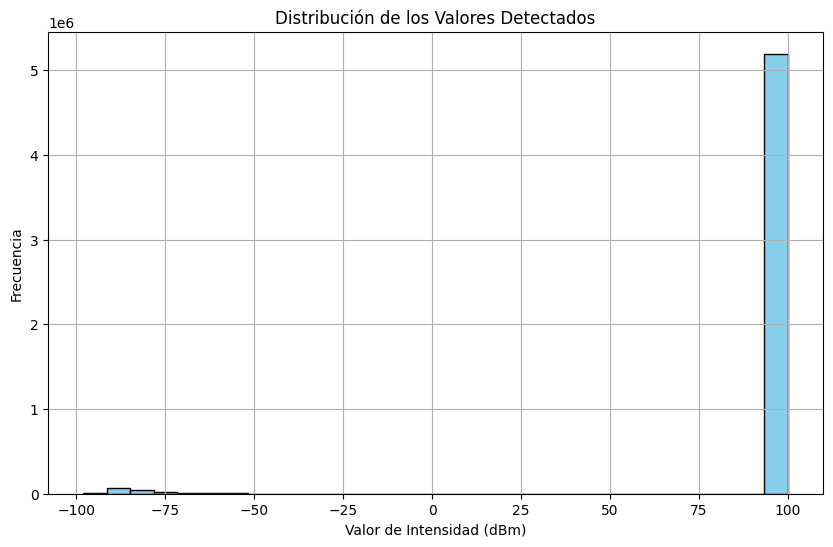

Media de los valores detectados: 94.50
Desviación estándar de los valores detectados: 31.17


In [7]:
import matplotlib.pyplot as plt

# Estadísticas básicas
media_valores = np.mean(df_i.values)
desviacion_estandar = np.std(df_i.values)

plt.figure(figsize=(10, 6))
plt.hist(df_i.values.flatten(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Valores Detectados')
plt.xlabel('Valor de Intensidad (dBm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print(f"Media de los valores detectados: {media_valores:.2f}")
print(f"Desviación estándar de los valores detectados: {desviacion_estandar:.2f}")

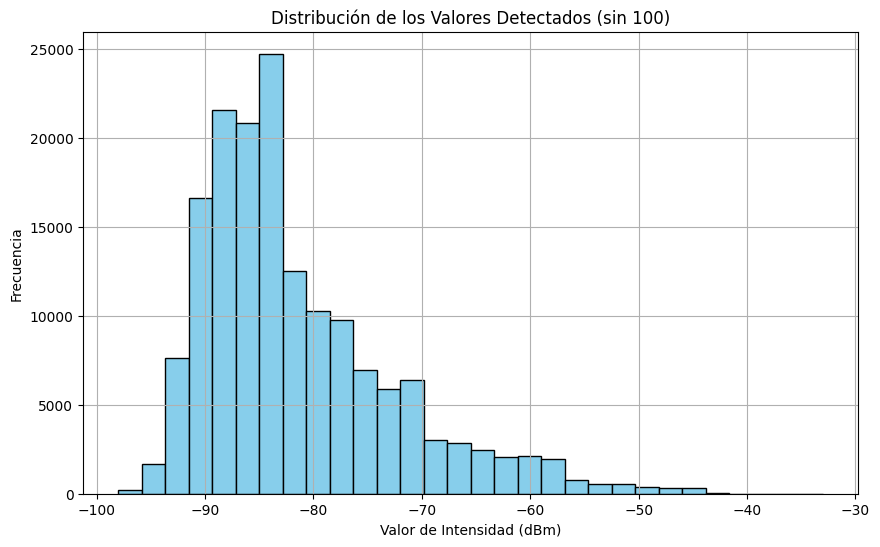

Media de los valores detectados (sin 100): -81.61
Desviación estándar de los valores detectados (sin 100): 9.00


In [8]:
# Filtrar los valores diferentes de 100 en df_i
filtered_df_i = df_i[df_i != 100]

media_valores = np.nanmean(filtered_df_i.values)
desviacion_estandar = np.nanstd(filtered_df_i.values)

plt.figure(figsize=(10, 6))
plt.hist(filtered_df_i.values.flatten(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Valores Detectados (sin 100)')
plt.xlabel('Valor de Intensidad (dBm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print(f"Media de los valores detectados (sin 100): {media_valores:.2f}")
print(f"Desviación estándar de los valores detectados (sin 100): {desviacion_estandar:.2f}")

Quines APs no se utilizen en el mes 1?




In [9]:
inactive_aps_this_month = df_i.columns[(df_i == 100).all()]
print(inactive_aps_this_month,"\n")
print("AP's inactivas en junio 2016:", len(inactive_aps_this_month))

Index([182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       ...
       610, 611, 612, 613, 614, 615, 616, 617, 618, 619],
      dtype='int64', length=438) 

AP's inactivas en junio 2016: 438


In [10]:
def analyze_potential_active_aps(df, umbral):
    missing_counts = (df == 100).sum()
    total_measurements = df.shape[0]
    active_aps = {}
    for ap, missing_count in missing_counts.items():
        proportion = 1 - (missing_count / total_measurements)  # Proporción de mediciones con detección
        if proportion > umbral:  # Si la proporción de mediciones con detección es mayor al umbral%, considerarlo activo
            active_aps[ap] = proportion

    active_aps_df = pd.DataFrame.from_dict(active_aps, orient='index', columns=['Proporción de Mediciones con Detección'])
    active_aps_df.index.name = 'Punto de Acceso'


    return active_aps


umbral = 0.5
# Llamada a la función para analizar los potenciales PAs activos
active_aps = analyze_potential_active_aps(df_i, umbral)

Ahora repetimos el kNN solo para estas AP's (y definimos la kNN como una funcion para no tener que escribirla todo el rato)

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go

def knn_colums(df_i, proportion):
  active_aps = list(analyze_potential_active_aps(df_i, umbral))
  df_i_active_aps = df_i.iloc[:,active_aps]
  t_df_i_active_aps = t_df_i.iloc[:, active_aps]

  num_vecinos = 3 # Para probar otras opciones

  knn = NearestNeighbors(n_neighbors=num_vecinos)
  knn.fit(df_i_active_aps, df_o)
  distances_active, indices_active = knn.kneighbors(t_df_i_active_aps)


  knn_df_o_errors=[]


  for i in range(len(t_df_i_active_aps)):
      knn_df_o = df_o.iloc[indices_active[i],:].mean(axis=0)
      distancia_euclidea = np.linalg.norm(t_df_o.iloc[i,:].values - knn_df_o.values)

      knn_df_o_errors.append(distancia_euclidea)

  media_active_ap = np.mean(knn_df_o_errors)
  desviacion_estandar_active_ap = np.std(knn_df_o_errors)
  minimo_active_ap = np.min(knn_df_o_errors)
  maximo_active_ap = np.max(knn_df_o_errors)

  print(f"Media: {media_active_ap:.2f}")
  print(f"Desviación estándar: {desviacion_estandar_active_ap:.2f}")
  print(f"Mínimo: {minimo_active_ap:.2f}")
  print(f"Máximo: {maximo_active_ap:.2f}")

  print("\n")
  print("\n")

  return media_active_ap

Probamos a ver cual es el mejor umbral, proponemos unos cuantos

Vector de errores cuando tenemos todos los PA:
Media: 2.80
Desviación estándar: 9.00
Mínimo: 0.00
Máximo: 9.85






Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al 0.0%
Media: 2.80
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 9.85




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al 0.5%
Media: 2.79
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 9.85




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al 1.0%
Media: 2.80
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 9.85




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al 1.5%
Media: 2.81
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 9.85




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al 2.0%
Media: 2.81
Desviación estándar: 1.79
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando el PA cuando la proporción de me

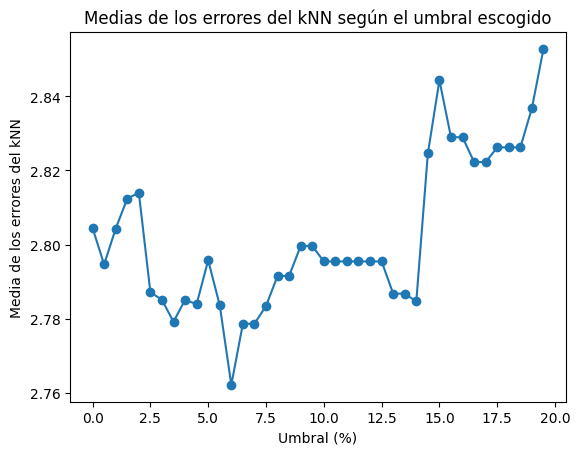

In [12]:
umbrales = np.arange(0, 0.2, 0.005)

errores_dict = {}

print("Vector de errores cuando tenemos todos los PA:")
# Asumiendo que 'media', 'desviacion_estandar', 'minimo', 'maximo' ya están definidos
print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")

print("\n")
print("\n")
print("\n")

# Calculamos la media de los errores para cada umbral y lo almacenamos en el diccionario
for umbral in umbrales:
    porcentaje = umbral * 100
    print(f"Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al {porcentaje:.1f}%")
    media_active_ap = knn_colums(df_i, umbral)
    errores_dict[porcentaje] = media_active_ap

print(errores_dict)

# Graficamos los valores del diccionario
plt.plot(list(errores_dict.keys()), list(errores_dict.values()), '-o')
# Añadir etiquetas al eje x y al eje y
plt.xlabel('Umbral (%)')
plt.ylabel('Media de los errores del kNN')

# Añadir título a la gráfica
plt.title('Medias de los errores del kNN según el umbral escogido')

# Mostrar la gráfica
plt.show()

Vector de errores cuando tenemos todos los PA:
Media: 2.80
Desviación estándar: 9.00
Mínimo: 0.00
Máximo: 9.85






Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al  5.5 %
Media: 2.78
Desviación estándar: 1.76
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al  5.55 %
Media: 2.78
Desviación estándar: 1.76
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al  5.6000000000000005 %
Media: 2.77
Desviación estándar: 1.77
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al  5.65 %
Media: 2.77
Desviación estándar: 1.77
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al  5.7 %
Media: 2.77
Desviación estándar: 1.77
Mínimo: 0.00
Máximo: 10.37




Vector de errores cuando e

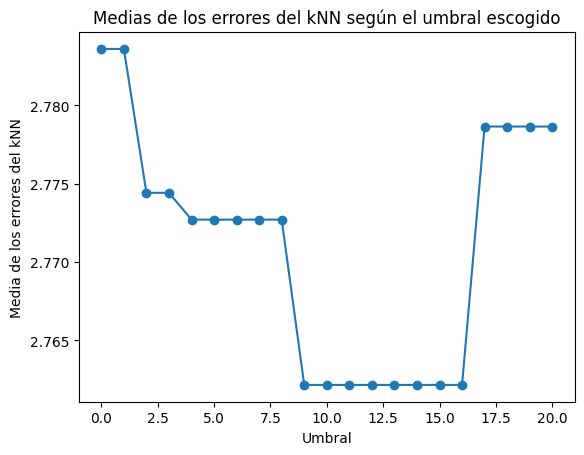

In [13]:
umbrales = np.arange(0.055, 0.065, 0.0005)

print("Vector de errores cuando tenemos todos los PA:")
print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")

print("\n")
print("\n")
print("\n")

media_active_ap_vector = []

for umbral in umbrales:

  print("Vector de errores cuando el PA cuando la proporción de mediciones con detección es mayor al ", umbral * 100 , "%")
  media_active_ap = knn_colums(df_i, umbral)
  media_active_ap_vector.append(media_active_ap)


print(media_active_ap_vector)

plt.plot(media_active_ap_vector, '-o')
# Añadir etiquetas al eje x y al eje y
plt.xlabel('Umbral')
plt.ylabel('Media de los errores del kNN')

# Añadir título a la gráfica
plt.title('Medias de los errores del kNN según el umbral escogido')

# Mostrar la gráfica
plt.show()

In [14]:
print("Entonces, ¿cual es el menor umbral?")
umbral_definitivo = umbrales[media_active_ap_vector.index(min(media_active_ap_vector))]
print(umbral_definitivo)

Entonces, ¿cual es el menor umbral?
0.059500000000000004


In [15]:
print("Aleshores, ens quedem en el df_i y t_df_i que compleix que els PA definits en aquesta base de dades, tenen deteccions al menys un 5.95% de les vegades")
active_aps = list(analyze_potential_active_aps(df_i, umbral_definitivo))
X_train = df_i.iloc[:,active_aps]
X_test = t_df_i.iloc[:,active_aps]
y_train = df_o
y_test = t_df_o

Aleshores, ens quedem en el df_i y t_df_i que compleix que els PA definits en aquesta base de dades, tenen deteccions al menys un 5.95% de les vegades


COMPARATIVA DE ALGORITMOS **NO INCREMENTALES**

kNN

In [16]:
from sklearn.neighbors import NearestNeighbors
import time

start_train = time.time()
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
distances, indices = neigh.kneighbors(X_test)
end_pred = time.time()


errores=[]

for i in range(len(X_test)):
    errores_i = y_train.iloc[indices[i],:].mean(axis=0)
    distancia_euclidea = np.linalg.norm(y_test.iloc[i,:].values - errores_i.values)

    errores.append(distancia_euclidea)

media_knn = np.mean(errores)
desviacion_estandar_knn = np.std(errores)
minimo_knn = np.min(errores)
maximo_knn = np.max(errores)
tiempo_entrenamiento_knn = end_train - start_train
tiempo_prediccion_knn = end_pred - start_pred


print("Visión general del rendimiento y la dispersión de las predicciones del modelo kNN")
print(f"Media: {media_knn:.2f}")
print(f"Desviación estándar: {desviacion_estandar_knn:.2f}")
print(f"Mínimo: {minimo_knn:.2f}")
print(f"Máximo: {maximo_knn:.2f}")
print(f"Tiempo entrenamiento: {tiempo_entrenamiento_knn:.2f}")
print(f"Tiempo predicciones: {tiempo_prediccion_knn:.2f}")

Visión general del rendimiento y la dispersión de las predicciones del modelo kNN
Media: 2.76
Desviación estándar: 1.77
Mínimo: 0.00
Máximo: 10.37
Tiempo entrenamiento: 0.01
Tiempo predicciones: 0.93


SVR

In [17]:
from sklearn.svm import SVR
import numpy as np

svr_x = SVR()
svr_y = SVR()
svr_z = SVR()

start_train = time.time()
svr_x.fit(X_train, y_train.iloc[:, 0])
svr_y.fit(X_train, y_train.iloc[:, 1])
svr_z.fit(X_train, y_train.iloc[:, 2])
end_train = time.time()

start_pred = time.time()
pred_x = svr_x.predict(X_test)
pred_y = svr_y.predict(X_test)
pred_z = svr_z.predict(X_test)
end_pred = time.time()


svm_predictions = np.vstack((pred_x, pred_y, pred_z)).T

errores = []

for i in range(len(X_test)):
    distancia_euclidea = np.linalg.norm(y_test.iloc[i, :].values - svm_predictions[i])
    errores.append(distancia_euclidea)

media_svr = np.mean(errores)
desviacion_estandar_svr = np.std(errores)
minimo_svr = np.min(errores)
maximo_svr = np.max(errores)
tiempo_entrenamiento_svr = end_train - start_train
tiempo_prediccion_svr = end_pred - start_pred

print("Visión general del rendimiento y la dispersión de las predicciones del modelo SVR")
print(f"Media: {media_svr:.2f}")
print(f"Desviación estándar: {desviacion_estandar_svr:.2f}")
print(f"Mínimo: {minimo_svr:.2f}")
print(f"Máximo: {maximo_svr:.2f}")
print(f"Tiempo entrenamiento: {tiempo_entrenamiento_svr:.2f}")
print(f"Tiempo predicciones: {tiempo_prediccion_svr:.2f}")

Visión general del rendimiento y la dispersión de las predicciones del modelo SVR
Media: 2.44
Desviación estándar: 1.41
Mínimo: 0.06
Máximo: 8.37
Tiempo entrenamiento: 14.86
Tiempo predicciones: 4.77


Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_x = RandomForestRegressor()
rf_y = RandomForestRegressor()
rf_z = RandomForestRegressor()

start_train = time.time()
rf_x.fit(X_train, y_train.iloc[:, 0])
rf_y.fit(X_train, y_train.iloc[:, 1])
rf_z.fit(X_train, y_train.iloc[:, 2])
end_train = time.time()

start_pred = time.time()
pred_x = rf_x.predict(X_test)
pred_y = rf_y.predict(X_test)
pred_z = rf_z.predict(X_test)
end_pred = time.time()

rf_predictions = np.vstack((pred_x, pred_y, pred_z)).T

errores = []

for i in range(len(X_test)):
    distancia_euclidea = np.linalg.norm(y_test.iloc[i, :].values - rf_predictions[i])
    errores.append(distancia_euclidea)

media_rf = np.mean(errores)
desviacion_estandar_rf = np.std(errores)
minimo_rf = np.min(errores)
maximo_rf = np.max(errores)
tiempo_entrenamiento_rf = end_train - start_train
tiempo_prediccion_rf = end_pred - start_pred


print("Visión general del rendimiento y la dispersión de las predicciones del modelo Random forest")
print(f"Media: {media_rf:.2f}")
print(f"Desviación estándar: {desviacion_estandar_rf:.2f}")
print(f"Mínimo: {minimo_rf:.2f}")
print(f"Máximo: {maximo_rf:.2f}")
print(f"Tiempo entrenamiento: {tiempo_entrenamiento_rf:.2f}")
print(f"Tiempo predicciones: {tiempo_prediccion_rf:.2f}")

Visión general del rendimiento y la dispersión de las predicciones del modelo Random forest
Media: 2.06
Desviación estándar: 1.33
Mínimo: 0.02
Máximo: 8.51
Tiempo entrenamiento: 22.56
Tiempo predicciones: 0.15


NN

In [19]:
from sklearn.neural_network import MLPRegressor
import numpy as np

nn_x = MLPRegressor()
nn_y = MLPRegressor()
nn_z = MLPRegressor()

start_train = time.time()
nn_x.fit(X_train, y_train.iloc[:, 0])
nn_y.fit(X_train, y_train.iloc[:, 1])
nn_z.fit(X_train, y_train.iloc[:, 2])
end_train = time.time()

start_pred = time.time()
pred_x = nn_x.predict(X_test)
pred_y = nn_y.predict(X_test)
pred_z = nn_z.predict(X_test)
end_pred = time.time()

nn_predictions = np.vstack((pred_x, pred_y, pred_z)).T

errores = []
for i in range(len(X_test)):
    distancia_euclidea = np.linalg.norm(y_test.iloc[i, :].values - nn_predictions[i])
    errores.append(distancia_euclidea)

media_nn = np.mean(errores)
desviacion_estandar_nn = np.std(errores)
minimo_nn = np.min(errores)
maximo_nn = np.max(errores)
tiempo_entrenamiento_nn = end_train - start_train
tiempo_prediccion_nn = end_pred - start_pred


print("Visión general del rendimiento y la dispersión de las predicciones del modelo de redes neuronales")
print(f"Media: {media_nn:.2f}")
print(f"Desviación estándar: {desviacion_estandar_nn:.2f}")
print(f"Mínimo: {minimo_nn:.2f}")
print(f"Máximo: {maximo_nn:.2f}")
print(f"Tiempo entrenamiento: {tiempo_entrenamiento_nn:.2f}")
print(f"Tiempo predicciones: {tiempo_prediccion_nn:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Visión general del rendimiento y la dispersión de las predicciones del modelo de redes neuronales
Media: 3.50
Desviación estándar: 2.08
Mínimo: 0.10
Máximo: 18.43
Tiempo entrenamiento: 50.31
Tiempo predicciones: 0.02


In [20]:
import pandas as pd
from tabulate import tabulate

resultados = {
    "Modelo": ["kNN", "SVR", "Random Forest", "Neural Network"],
    "Media": [media_knn, media_svr, media_rf, media_nn],
    "Desviación Estándar": [desviacion_estandar_knn, desviacion_estandar_svr, desviacion_estandar_rf, desviacion_estandar_nn],
    "Mínimo": [minimo_knn, minimo_svr, minimo_rf, minimo_nn],
    "Máximo": [maximo_knn, maximo_svr, maximo_rf, maximo_nn],
    "Tiempo Entrenamiento (s)": [tiempo_entrenamiento_knn, tiempo_entrenamiento_svr, tiempo_entrenamiento_rf, tiempo_entrenamiento_nn],
    "Tiempo Predicciones (s)": [tiempo_prediccion_knn, tiempo_prediccion_svr, tiempo_prediccion_rf, tiempo_prediccion_nn]
}

print(tabulate(resultados, headers='keys', tablefmt='pretty', showindex=False))



+----------------+--------------------+---------------------+----------------------+--------------------+--------------------------+-------------------------+
|     Modelo     |       Media        | Desviación Estándar |        Mínimo        |       Máximo       | Tiempo Entrenamiento (s) | Tiempo Predicciones (s) |
+----------------+--------------------+---------------------+----------------------+--------------------+--------------------------+-------------------------+
|      kNN       | 2.7621509549399934 |  1.766958618969094  |         0.0          | 10.367564533513171 |   0.007265329360961914   |   0.9340426921844482    |
|      SVR       | 2.4415167527762924 |  1.410461953882755  | 0.060579787898769395 | 8.367533818190594  |    14.859352111816406    |    4.76707911491394     |
| Random Forest  | 2.057581898964485  | 1.3315053117492448  | 0.017881040999995435 | 8.510341033101154  |    22.564447164535522    |   0.1469419002532959    |
| Neural Network | 3.4981359518756214 |  2.084